<a href="https://colab.research.google.com/github/AchiengMary/bin.classification_model/blob/main/notebook1_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting data from zip file

In [1]:
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('images')

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Set Up the Data Generators for Augmentation

In [4]:
# Set up ImageDataGenerator with augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotations between -30 and 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom images by 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill the empty pixels after transformations
)

Load the Data

In [5]:
train_generator = datagen.flow_from_directory(
    'images/images/',  # Path to the dataset
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='binary',  # Since we have 2 classes: real and AI-generated
    shuffle=True  # Shuffle the dataset for randomness
)

Found 151 images belonging to 2 classes.


Visualize 5 Augmented Images

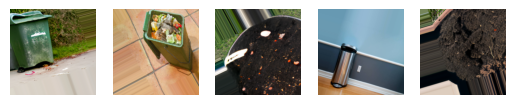

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
images, labels = next(train_generator)

# Display a few images from the batch
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

Fine tune ResNet50 to classify the images as real or AI-generated

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid re-training it
base_model.trainable = False

# Build the top layers for classification
model = models.Sequential([
    base_model,  # Add pre-trained ResNet50 model
    layers.GlobalAveragePooling2D(),  # Reduce dimensions
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training the model(10 epochs)

In [8]:
history = model.fit(
    train_generator,  # The data generator with images and augmentation
    steps_per_epoch=100,  # Number of batches per epoch
    epochs=10  # Number of epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 231ms/step - accuracy: 0.3371 - loss: 1.1976
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.3871 - loss: 0.7733
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - accuracy: 0.6583 - loss: 0.6138
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.6629 - loss: 0.6410
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.6611 - loss: 0.6631
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.6615 - loss: 0.6455
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.6604 - loss: 0.6211
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.6622 - loss: 0.6072
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - accuracy: 0.6630 - loss: 0.5995
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.6624 - loss: 0.6035


In [10]:
# Save the model in HDF5 format (it saves the architecture, weights, and training configuration)
model.save('my_model.h5')

In [11]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')

In [14]:
# Assuming you have a validation generator
validation_generator = datagen.flow_from_directory(
    '/images/images',  # Path to validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(
    train_generator,  # The training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,  # The validation data generator
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Number of validation batches per epoch
)

FileNotFoundError: [Errno 2] No such file or directory: '/images/images'

In [ ]:
# Assuming you have a validation generator
validation_generator = datagen.flow_from_directory(
    '/content/dataset/validation',  # Path to validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model
score = model.evaluate(validation_generator)
print(f"Validation Loss: {score[0]}")
print(f"Validation Accuracy: {score[1]}")